# Titanic Kaggle Challenge

---

1. Import packages
2. User Defined Funktions
2. Loading data with Pandas
3. Descriptive statistics of data
4. Data visualization
5. Feature Engineering
6. Model selection
7. Hyperparameter optimization
8. Evaluation of model
9. Prediction of test.csv
10. Remarks on possible Improvements

---

## 1. Import Libraries and Dataset

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, ConfusionMatrixDisplay, r2_score

In [142]:
def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))
    
def evaluation(model,x_test,y_test):
    

    print("Test AUC:",roc_auc_score(y_test, model.predict_proba(x_test)[:,1]))
    print('Train AU  :',roc_auc_score(ytrain_prep, model.predict_proba(xtrain_prep)[:,1]))
    #print(roc_auc_score(y_test, y_pred))
    axe.set_xlabel('Actual')
    axe.set_ylabel('Predicted')

In [78]:
df = pd.read_csv("D:\Programming\Python\Kaggle\Telco Churn\Telco-Customer-Churn.csv")

## 1. Getting to know the dataset

In [79]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
list(df.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are 3 numerical features, the rest is categorical

In [82]:
df.describe().T.style.background_gradient(cmap="RdPu")

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.000000,0.162147,0.368612,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,7043.000000,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7043.000000,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000


In [83]:
first_look('SeniorCitizen')

column name    :  SeniorCitizen
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


SeniorCitizen seems to be categorical after all

In [84]:
df.describe(include=object).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


TotalCharges has 6531 values and it has 11 empty values

In [85]:
first_look('TotalCharges')


column name    :  TotalCharges
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6531
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64


Values are numbers so it makes sense, that this should be a numerical feature

Change type to float and replace empty cells with np.nan

In [86]:

df['TotalCharges']= df['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)


DataAnalasys to find the right imputer strategy

In [87]:
df['tenure'].min()

0

In [88]:
first_look("tenure")

column name    :  tenure
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  73
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


In [89]:
np.where(df['tenure'] == df['tenure'].min())

(array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],
       dtype=int64),)

In [90]:
np.where(df['TotalCharges'] == df["TotalCharges"].min())

(array([1654], dtype=int64),)

indeces where the tenure is 0 and TotalCharges is 0 are the same
This means the Total Charges has to be 0 because they are new customers

In [91]:
df['TotalCharges']=df['TotalCharges'].fillna(0)
first_look('TotalCharges')

column name    :  TotalCharges
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6531
0.00       11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6531, dtype: int64


CustomerID has no value for the prediction of Churn so it is dropped
Also duplocate rows should be dropped

In [92]:
df.shape

(7043, 21)

In [93]:
df.drop("customerID", axis=1, inplace=True)
df.drop_duplicates(keep=False, inplace=True)
df.shape

(7001, 20)

# EDA

First lookk at the label

column name    :  Churn
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
No     5156
Yes    1845
Name: Churn, dtype: int64


([<matplotlib.patches.Wedge at 0x1a7e95678e0>,
 [Text(-0.7440535518657286, 0.8101754821987602, 'No'),
  Text(0.7440535518657289, -0.81017548219876, 'Yes')],
 [Text(-0.405847391926761, 0.44191389938114195, '73.6%'),
  Text(0.40584739192676117, -0.4419138993811418, '26.4%')])

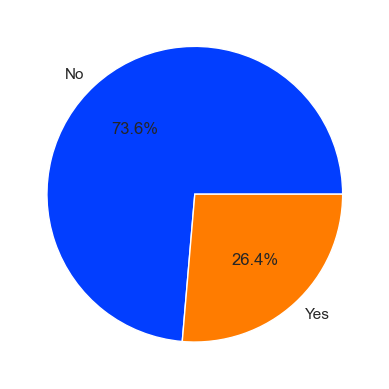

In [94]:
first_look('Churn')
churn_values = list(df['Churn'].value_counts())
colors = sns.color_palette('bright')[0:5]
plt.pie(x = churn_values, labels = ["No","Yes"], colors = colors, autopct='%.1f%%')

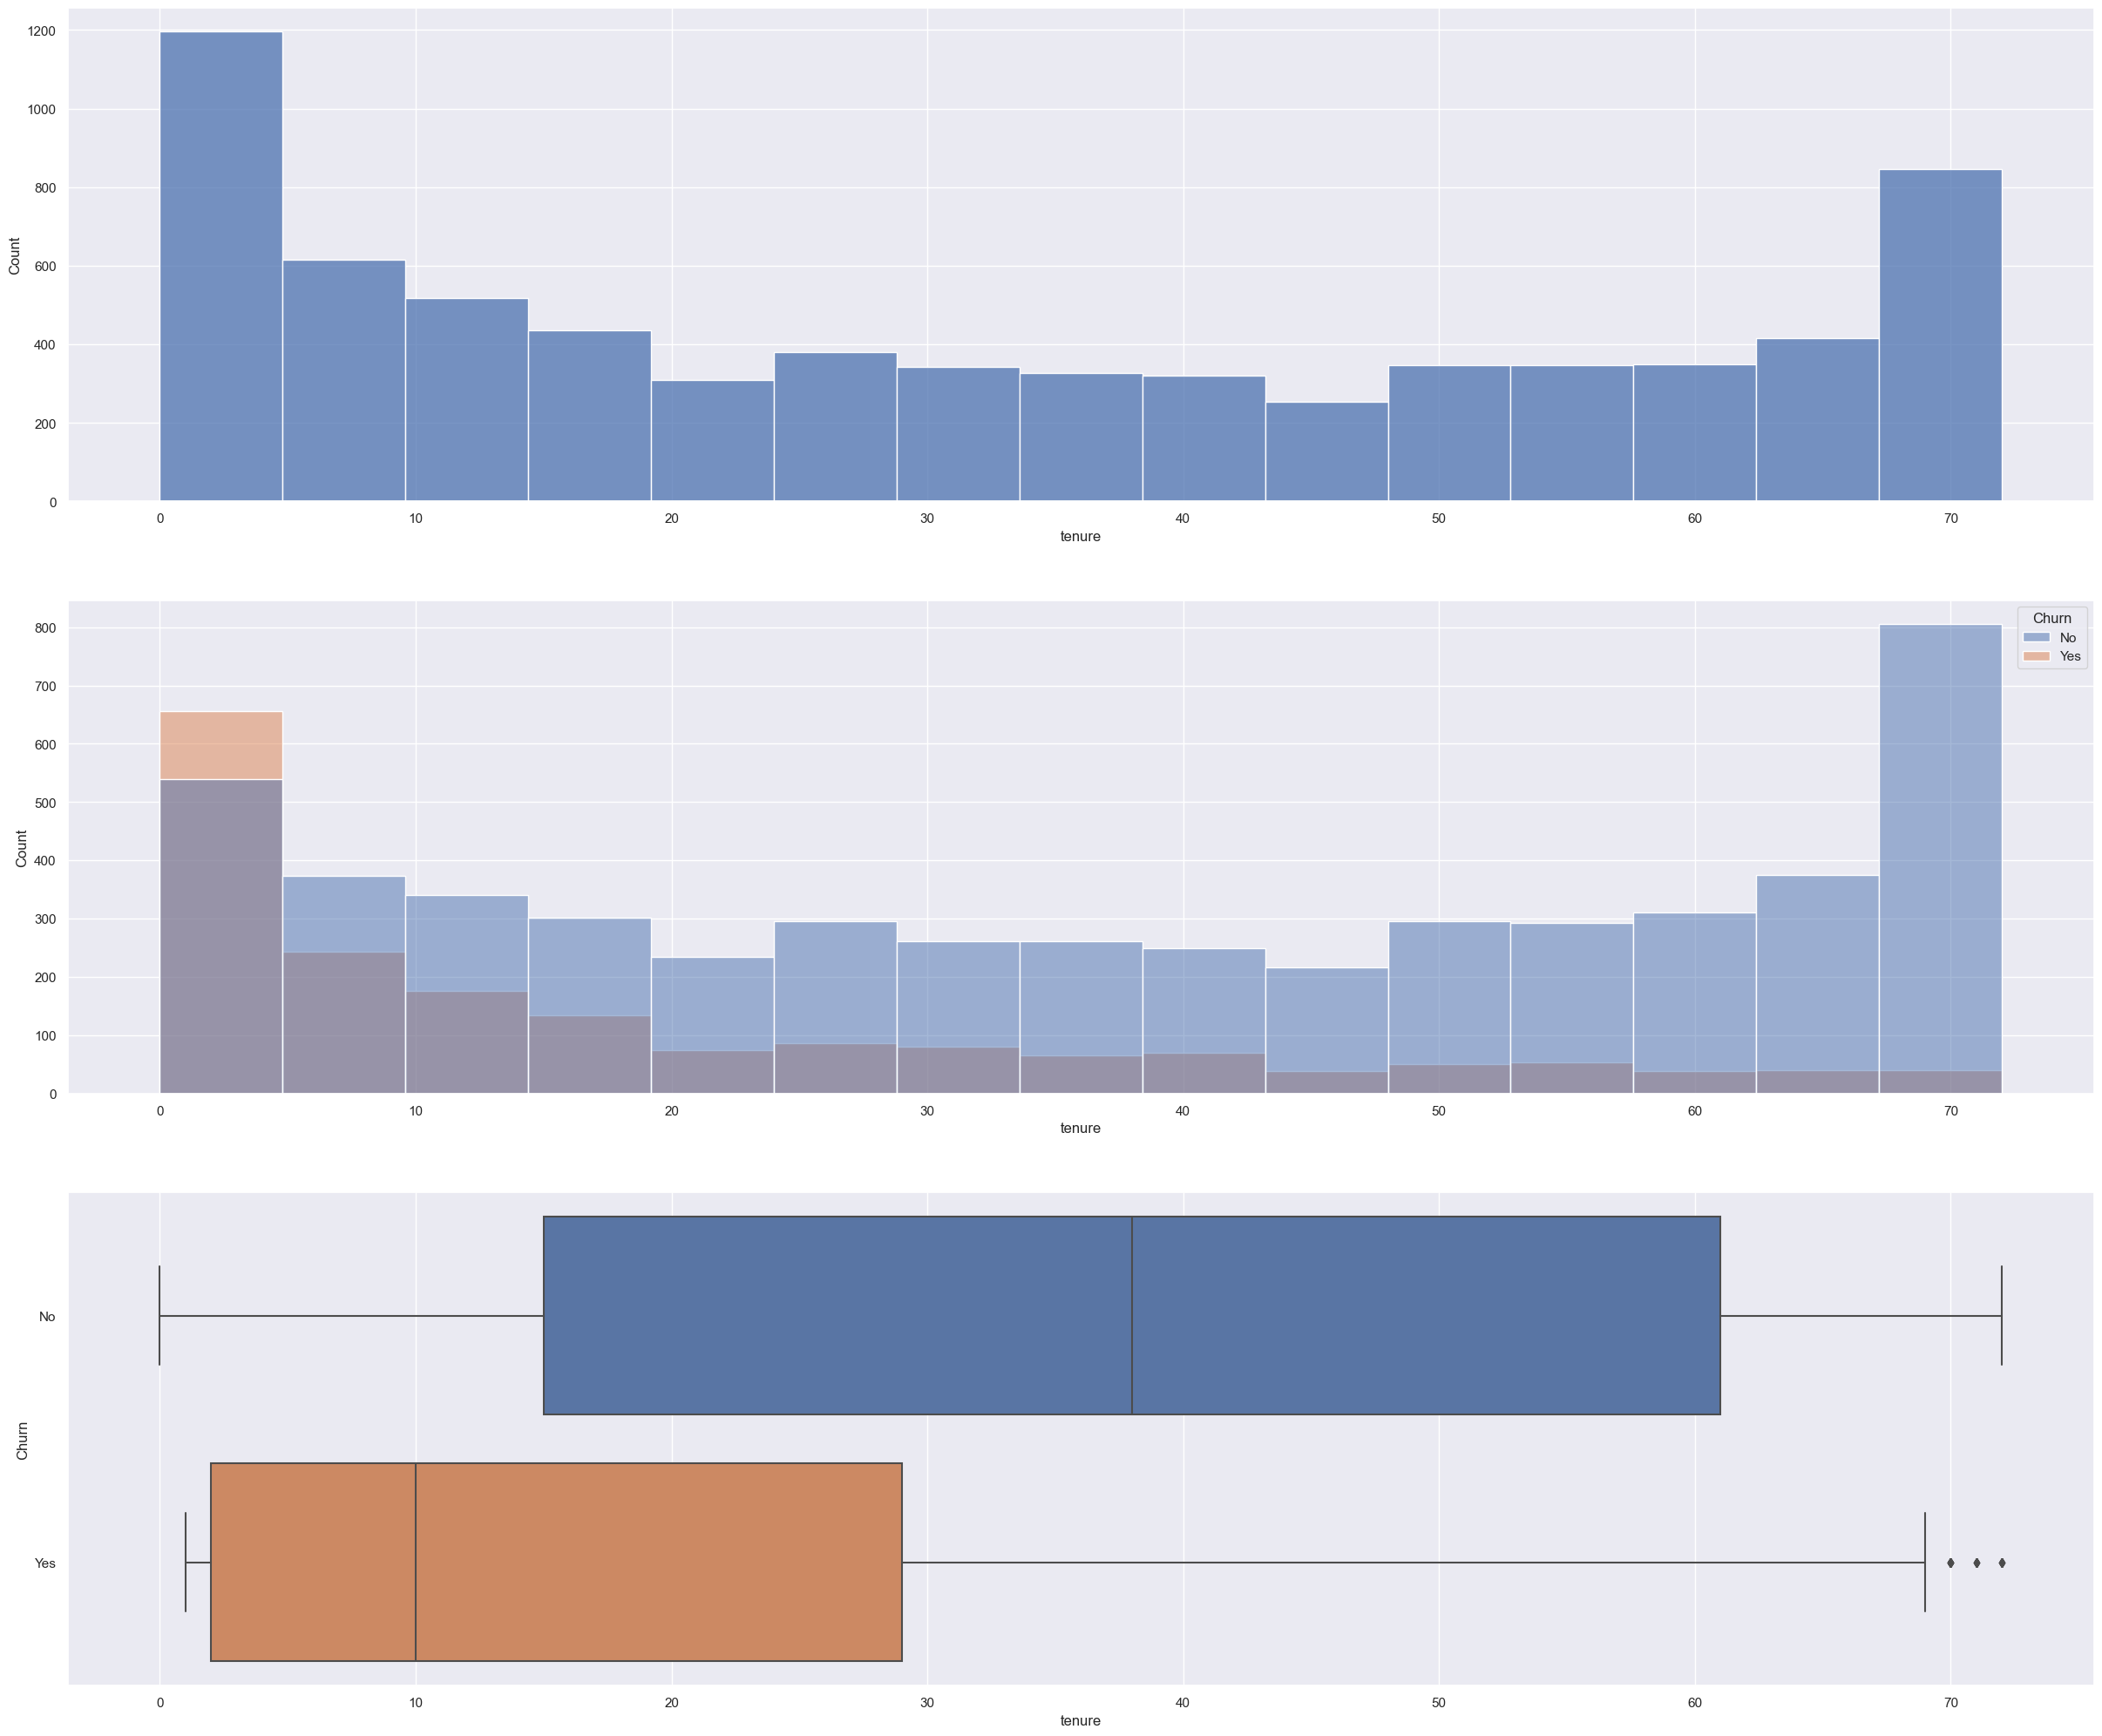

In [95]:
fig, ax = plt.subplots(3, figsize=(30, 25))

t = sns.histplot(data=df, x="tenure", ax=ax[0])
t = sns.histplot(data=df, x="tenure", ax=ax[1], hue="Churn")
t = sns.boxplot(x="tenure", y="Churn", data=df, ax=ax[2])

It seems like long-lasting customers are unlikely to churn 
Customers that have a tenure of under a year are highly likely to churn

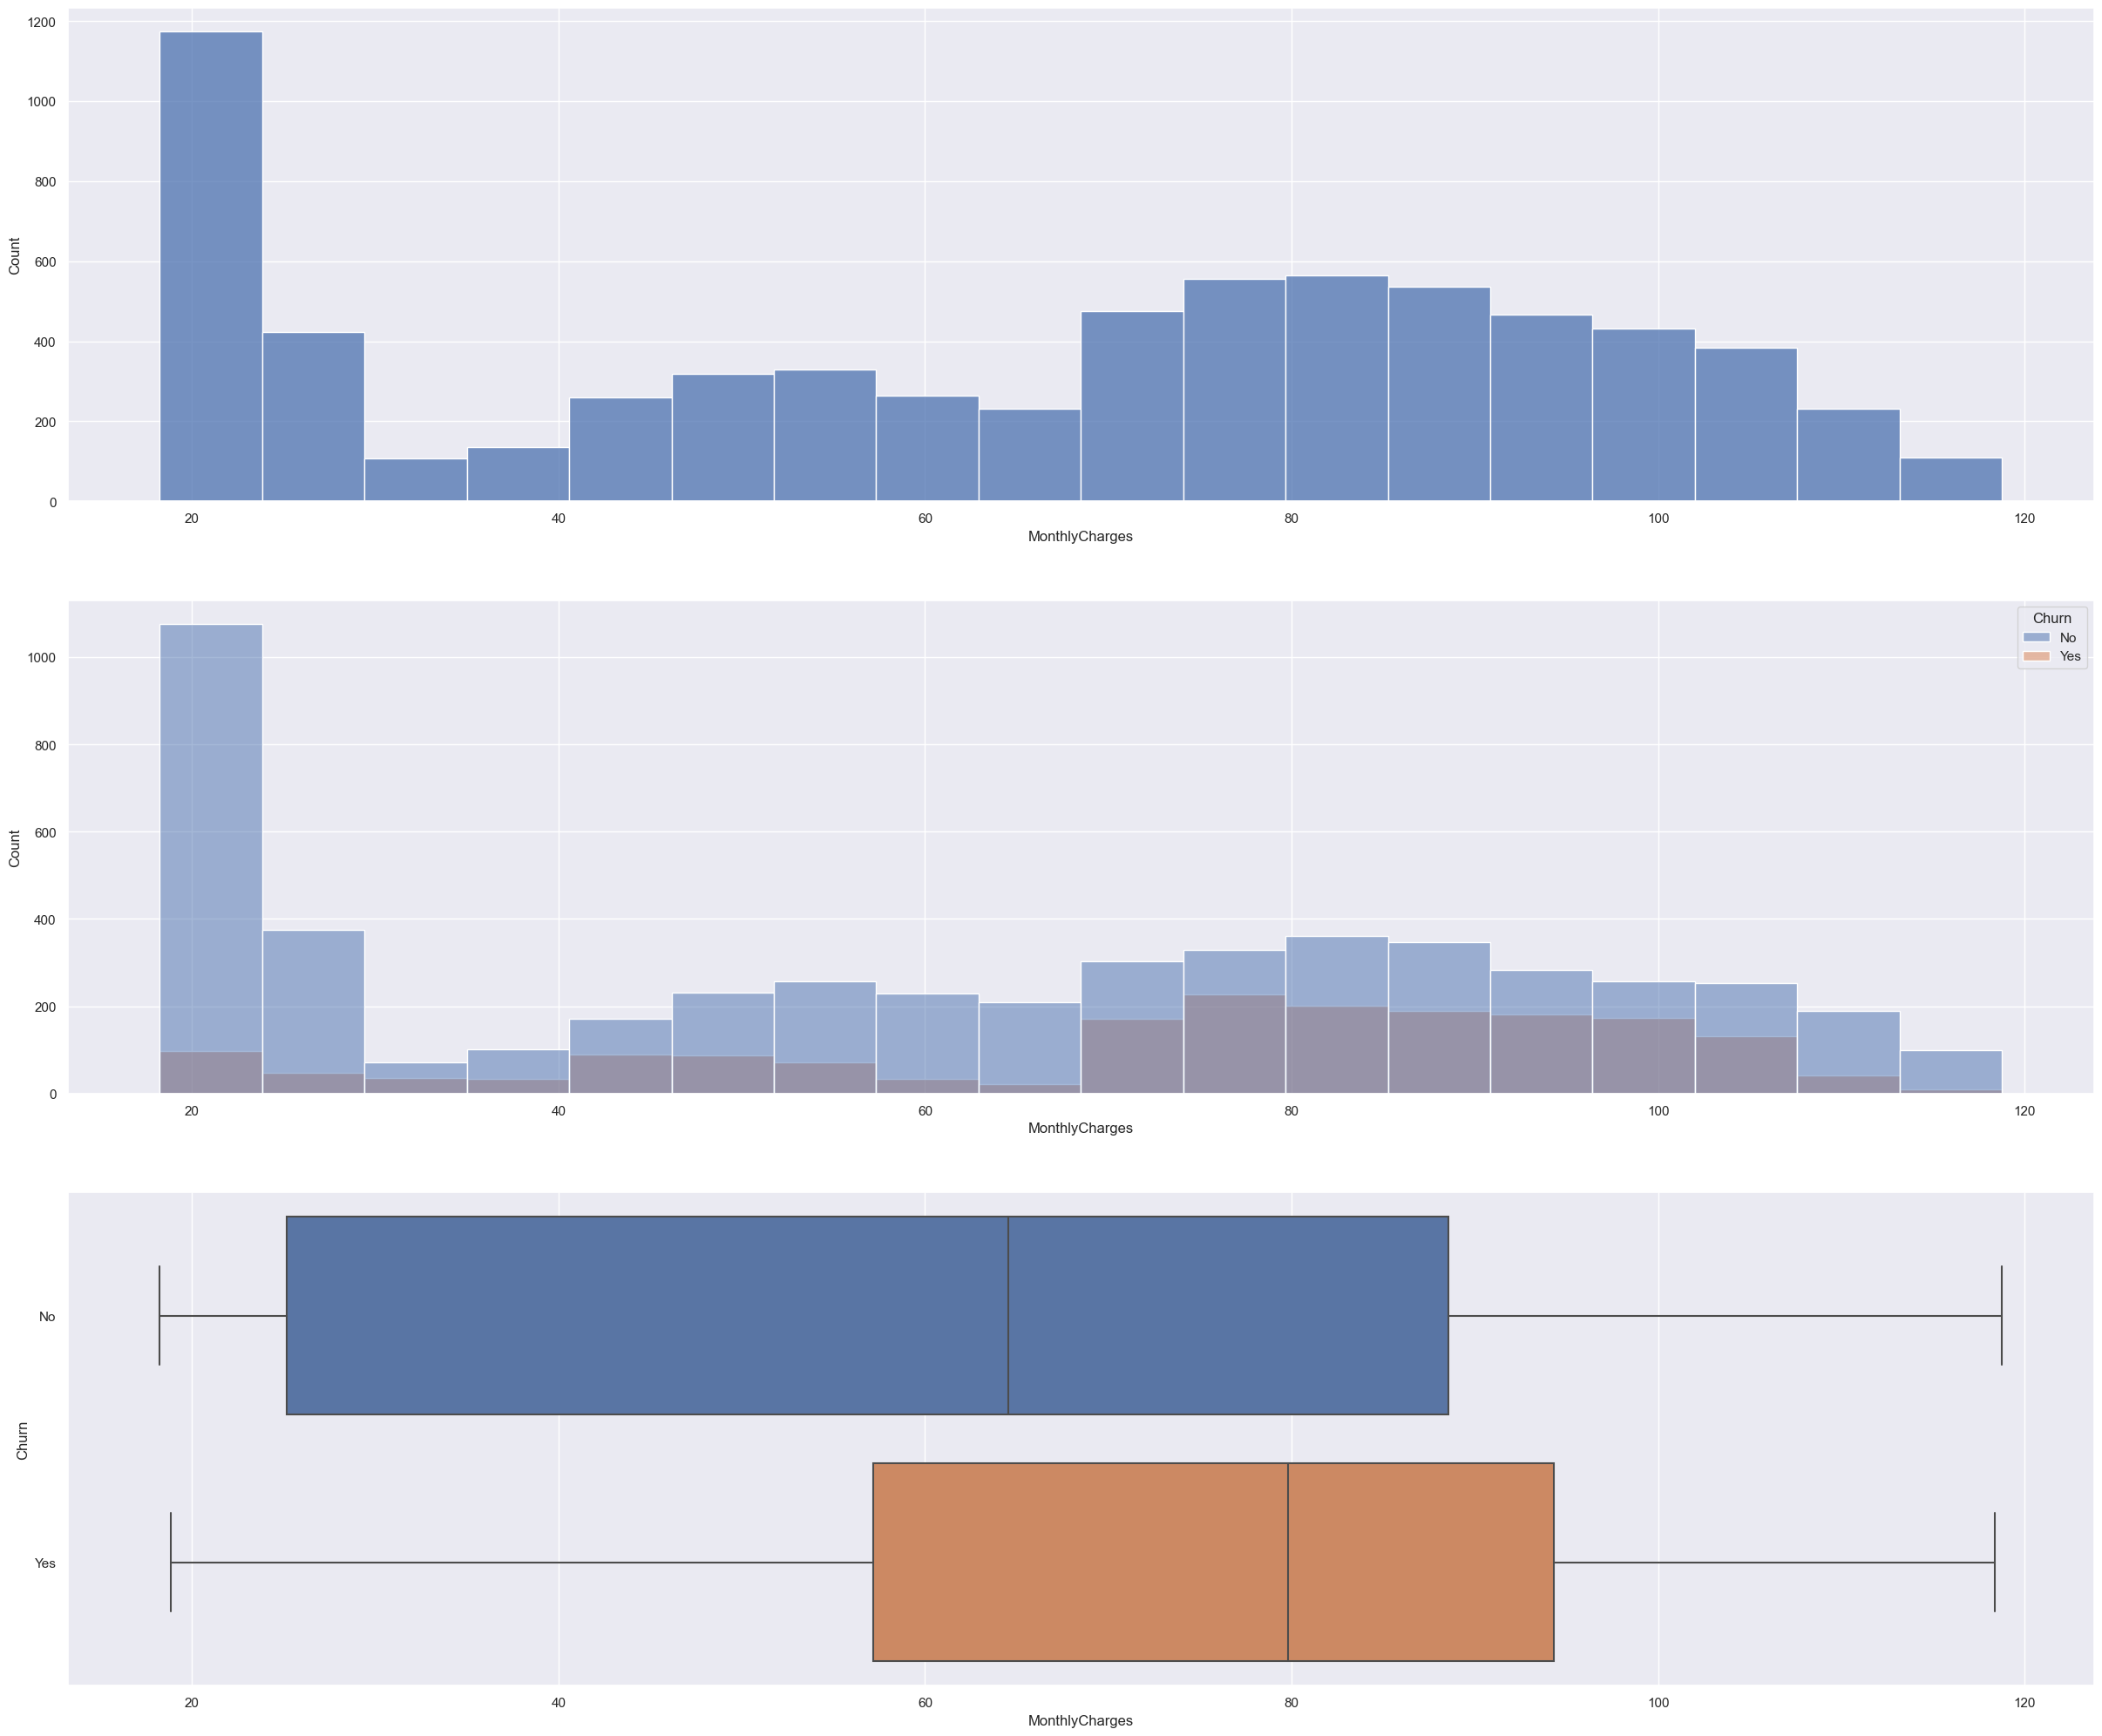

In [96]:
fig, ax = plt.subplots(3, figsize=(30, 25))

t = sns.histplot(data=df, x="MonthlyCharges", ax=ax[0])
t = sns.histplot(data=df, x="MonthlyCharges", ax=ax[1], hue="Churn")
t = sns.boxplot(x="MonthlyCharges", y="Churn", data=df, ax=ax[2])

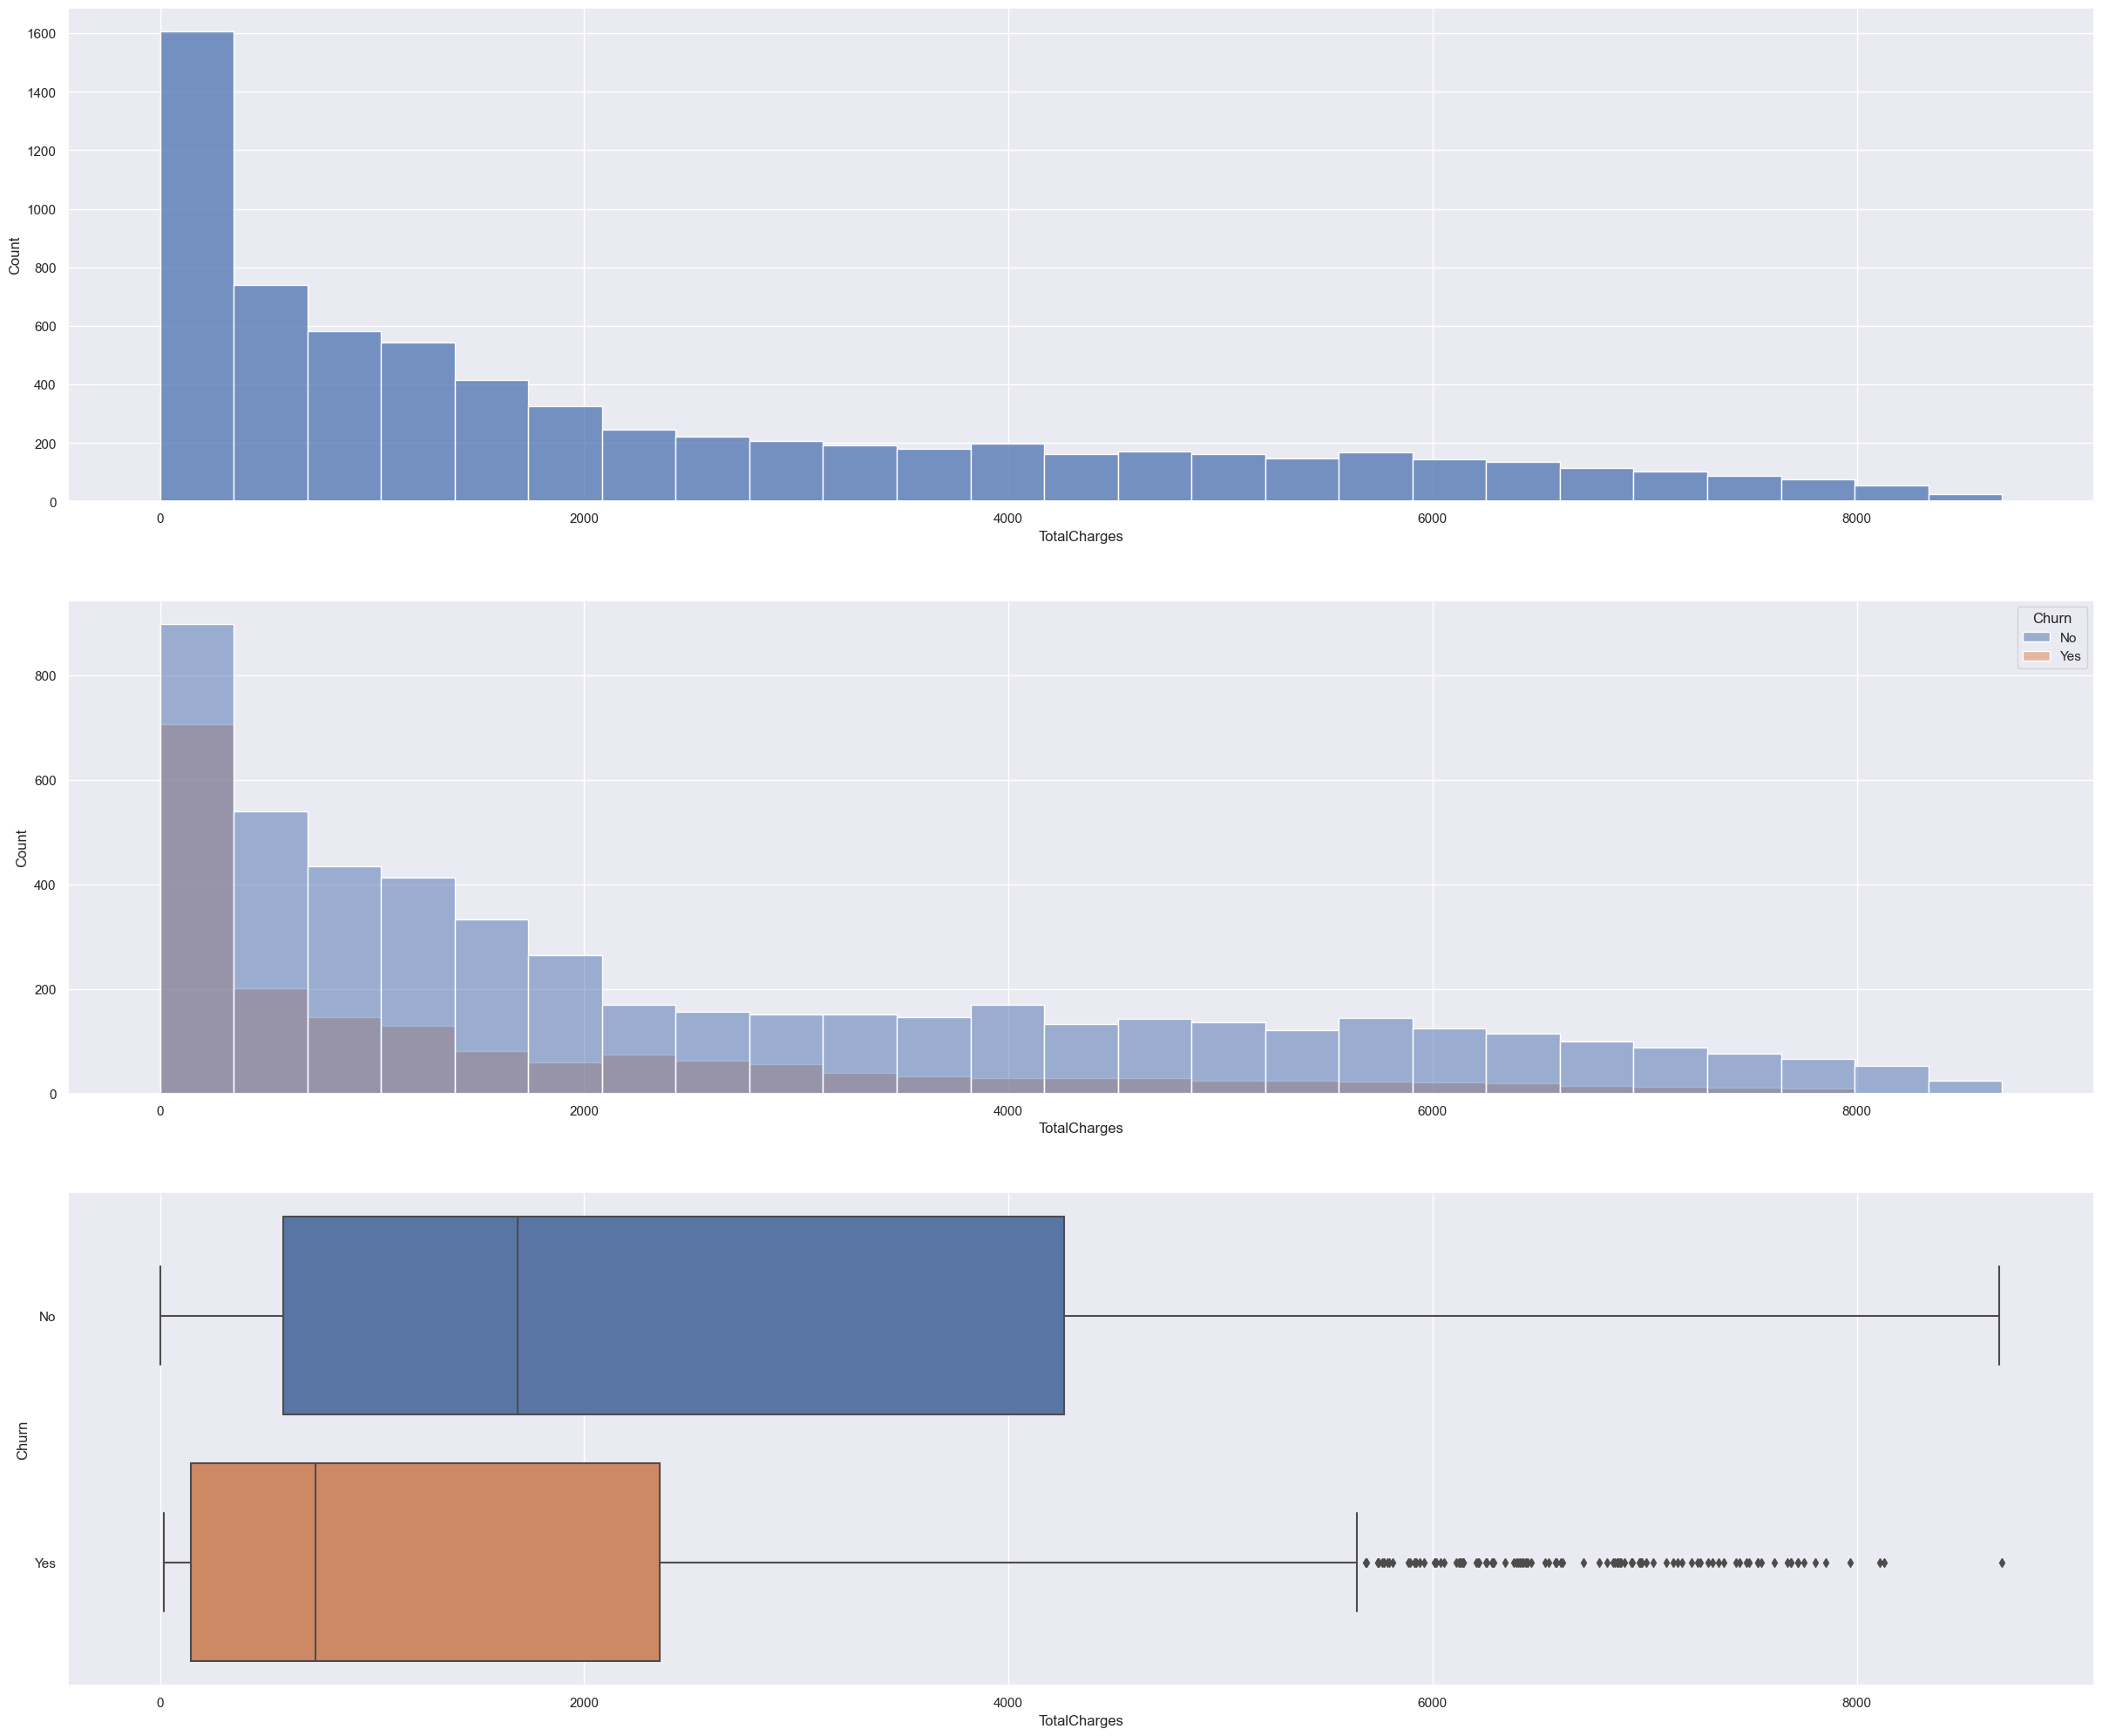

In [97]:
fig, ax = plt.subplots(3, figsize=(30, 25))

t = sns.histplot(data=df, x="TotalCharges", ax=ax[0])
t = sns.histplot(data=df, x="TotalCharges", ax=ax[1], hue="Churn")
t = sns.boxplot(x="TotalCharges", y="Churn", data=df, ax=ax[2])

Customers with a high Totalcharge are not likely to stay which is connected to the discovered relationship between Churn and tenure

## Visualization of categorical features

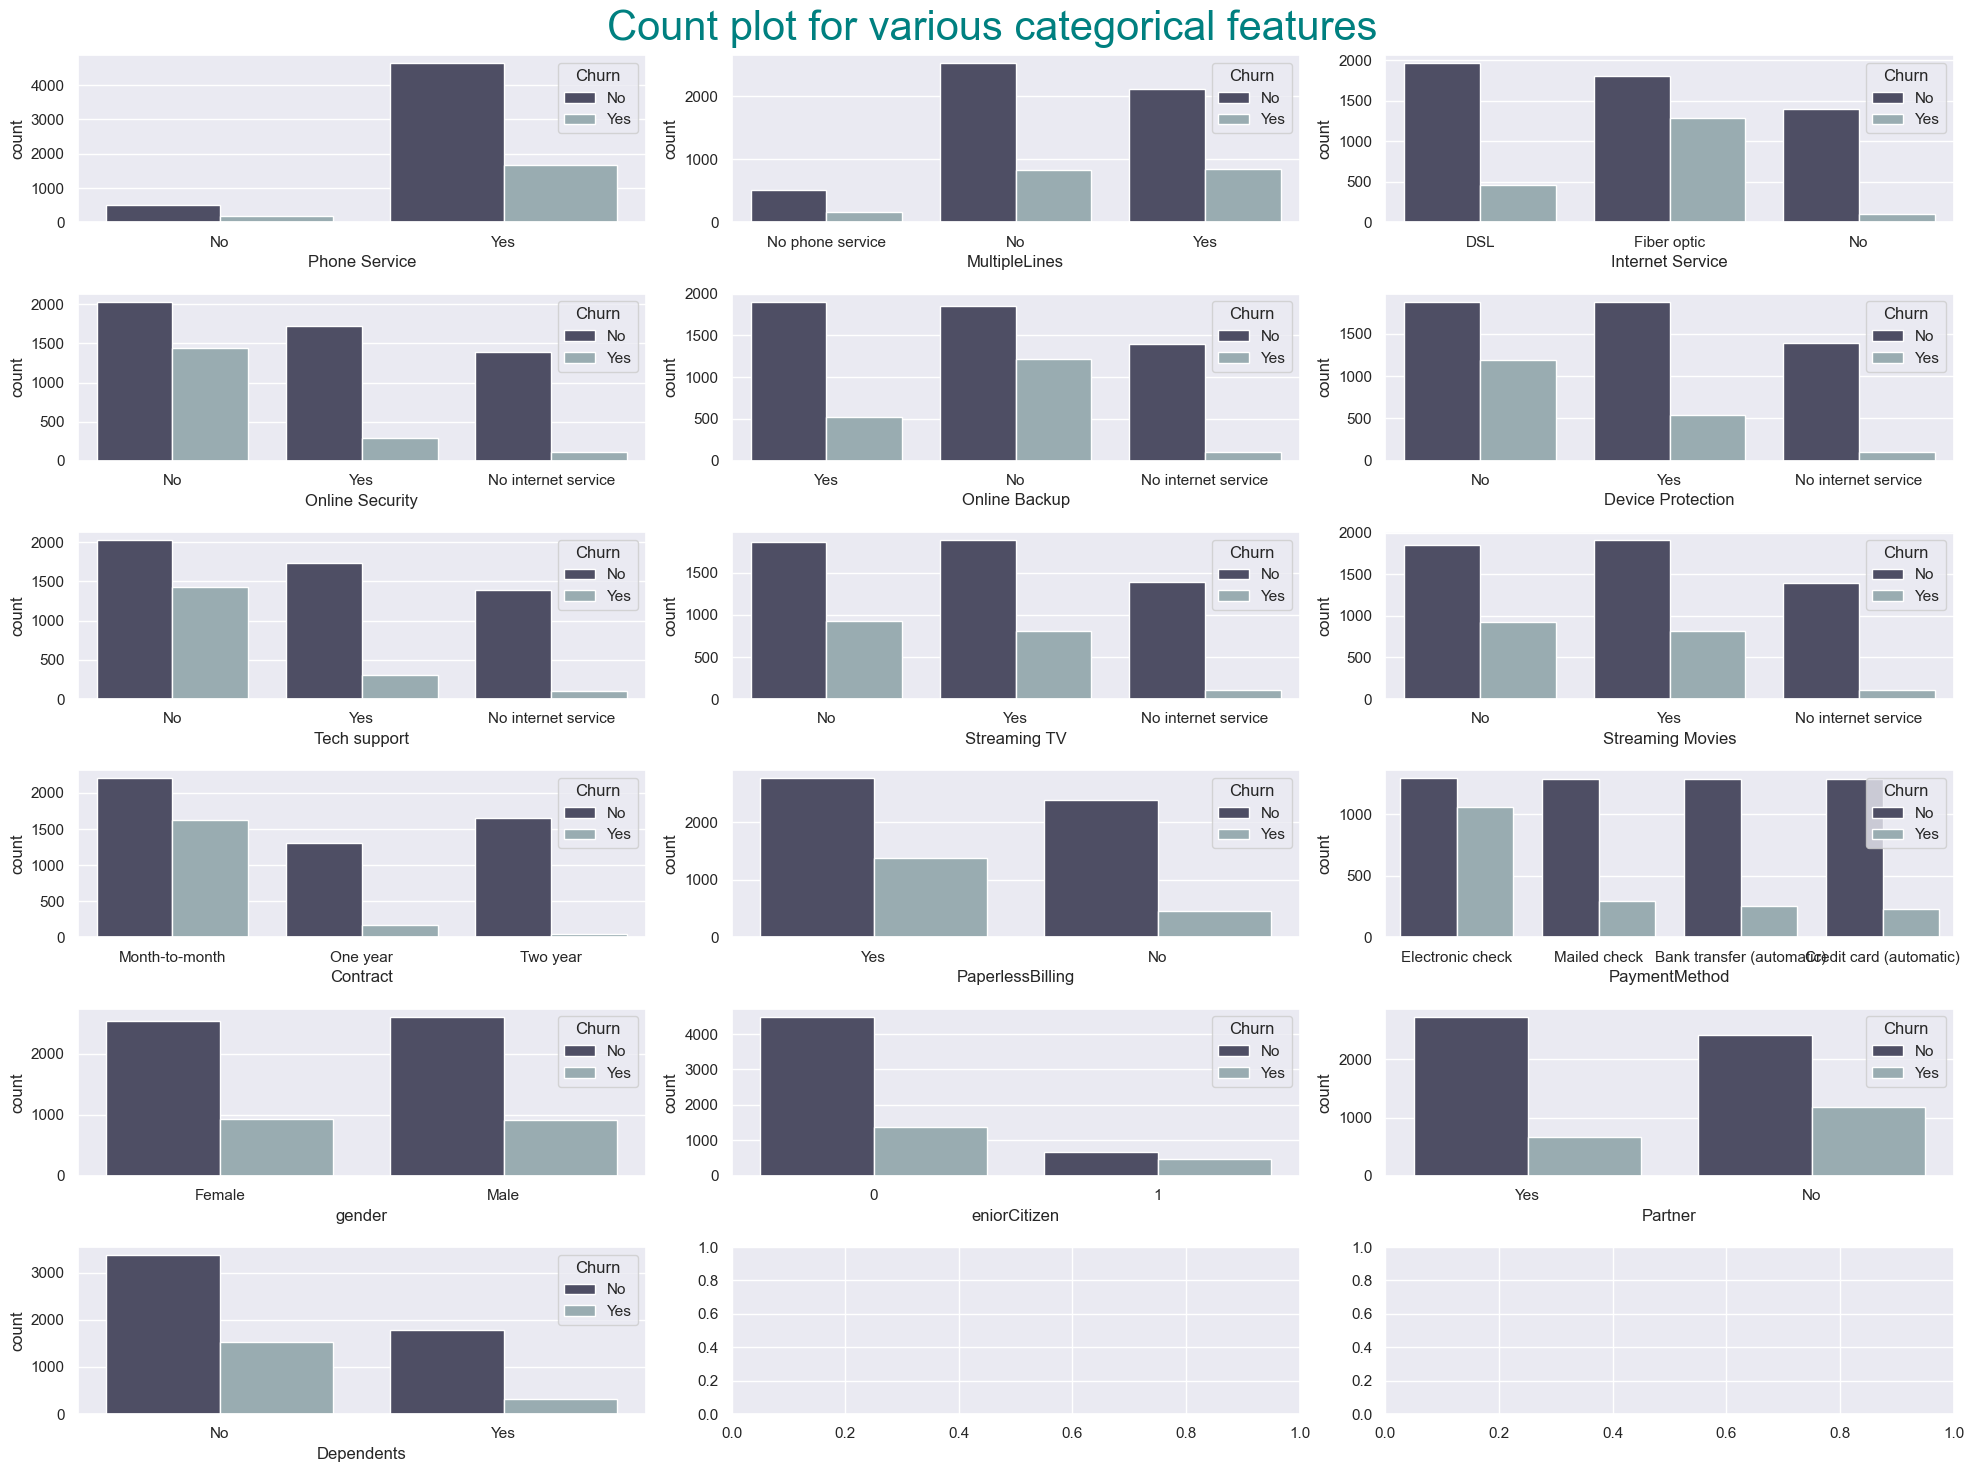

In [98]:
fig, ax = plt.subplots(6, 3, figsize = (20, 15))


plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='PhoneService', data= df, hue= 'Churn', ax= ax[0, 0], palette= 'bone')
ax1.set(xlabel = 'Phone Service')

ax2 = sns.countplot(x ='MultipleLines', data= df, hue= 'Churn', ax= ax[0, 1], palette= 'bone')
ax2.set(xlabel = 'MultipleLines')

ax3 = sns.countplot(x ='InternetService', data= df, hue= 'Churn', ax= ax[0, 2], palette= 'bone')
ax3.set(xlabel = 'Internet Service')

ax4 = sns.countplot(x ='OnlineSecurity', data= df, hue= 'Churn', ax= ax[1, 0], palette= 'bone')
ax4.set(xlabel = 'Online Security')

ax5 = sns.countplot(x ='OnlineBackup', data= df, hue= 'Churn', ax= ax[1, 1], palette= 'bone')
ax5.set(xlabel = 'Online Backup')

ax6 = sns.countplot(x ='DeviceProtection', data= df, hue= 'Churn', ax= ax[1, 2], palette= 'bone')
ax6.set(xlabel = 'Device Protection')

ax7 = sns.countplot(x ='TechSupport', data= df, hue= 'Churn', ax= ax[2, 0], palette= 'bone')
ax7.set(xlabel = 'Tech support')

ax8 = sns.countplot(x ='StreamingTV', data= df, hue= 'Churn', ax= ax[2, 1], palette= 'bone')
ax8.set(xlabel = 'Streaming TV')

ax9 = sns.countplot(x ='StreamingMovies', data= df, hue= 'Churn', ax= ax[2, 2], palette= 'bone')
ax9.set(xlabel = 'Streaming Movies')

ax9 = sns.countplot(x ='Contract', data= df, hue= 'Churn', ax= ax[3, 0], palette= 'bone')
ax9.set(xlabel = 'Contract')

ax10 = sns.countplot(x ='PaperlessBilling', data= df, hue= 'Churn', ax= ax[3, 1], palette= 'bone')
ax10.set(xlabel = 'PaperlessBilling')

ax11 = sns.countplot(x ='PaymentMethod', data= df, hue= 'Churn', ax= ax[3, 2], palette= 'bone')
ax11.set(xlabel = 'PaymentMethod')

ax12 = sns.countplot(x ='gender', data= df, hue= 'Churn', ax= ax[4, 0], palette= 'bone')
ax12.set(xlabel = 'gender')

ax13 = sns.countplot(x ='SeniorCitizen', data= df, hue= 'Churn', ax= ax[4, 1], palette= 'bone')
ax13.set(xlabel = 'eniorCitizen')

ax14 = sns.countplot(x ='Partner', data= df, hue= 'Churn', ax= ax[4, 2], palette= 'bone')
ax14.set(xlabel = 'Partner')

ax15 = sns.countplot(x ='Dependents', data= df, hue= 'Churn', ax= ax[5, 0], palette= 'bone')
ax15.set(xlabel = 'Dependents')


plt.tight_layout()
plt.show()

Customers without Online Security, Tech support, Online Backup and Device Protection are likely to churn
Customers with a month to month contract are more likely to churn

# Data Preprocessing Pipeline

In [99]:
#from sklearn.preprocessing import StandardScaler
y = df['Churn']
X = df.drop("Churn", axis = 1)
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
#X.shape

In [100]:
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.2, stratify = y)

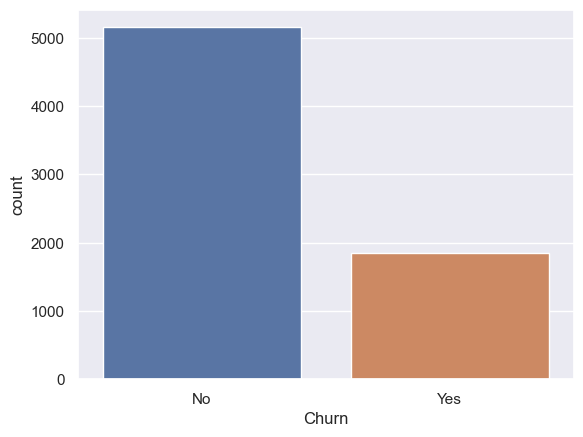

In [101]:
ax = sns.countplot(x=y)

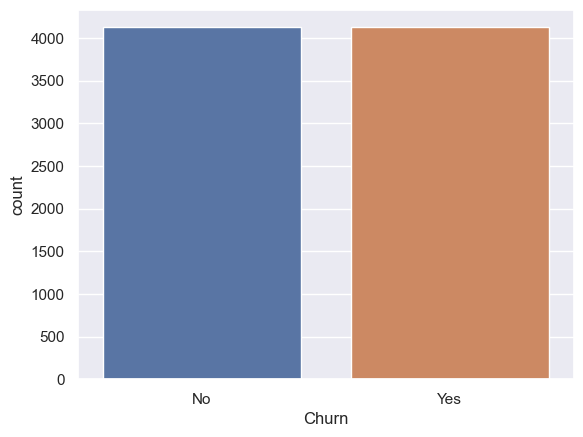

In [102]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
xtrain_oversample, ytrain_oversample = ros.fit_resample(xtrain, ytrain)
ax = sns.countplot(x=ytrain_oversample)

In [137]:
ytrain_prep = ytrain_oversample.map({"No":0, "Yes":1})
yvalid = yvalid.map({"No":0, "Yes":1})

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder



num_pipeline = Pipeline([
        ("scaler", StandardScaler())
    ])

cat_pipeline = Pipeline([
        ("cat_encoder", OneHotEncoder(sparse=False)),
])
 


In [105]:
from sklearn.compose import ColumnTransformer

num_attribs = ["TotalCharges", "MonthlyCharges", "tenure"]
 
cat_attribs = [ele for ele in xtrain.columns if ele not in num_attribs]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)
    ])

In [106]:
xtrain_prep = preprocess_pipeline.fit_transform(xtrain_oversample)
xtrain_prep = pd.DataFrame(xtrain_prep)

In [136]:
xvalid = preprocess_pipeline.fit_transform(xvalid)
xvalid = pd.DataFrame(xvalid)

Modeling

In [107]:
kfold=StratifiedKFold(n_splits=5,shuffle=True)

In [108]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve,KFold

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(xgboost.XGBClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))

In [109]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, xtrain_prep, y = ytrain_prep, scoring = "roc_auc", cv =kfold , n_jobs=-1))

   CrossValMeans  CrossValerrors           Algorithm
0       0.855956        0.009083                 SVC
1       0.869890        0.011357        DecisionTree
2       0.959805        0.003498            AdaBoost
3       0.966105        0.004705        RandomForest
4       0.973930        0.003165          ExtraTrees
5       0.868216        0.005334    GradientBoosting
6       0.928820        0.008104             Xgboost
7       0.838248        0.006452         KNeighboors
8       0.846807        0.004665  LogisticRegression


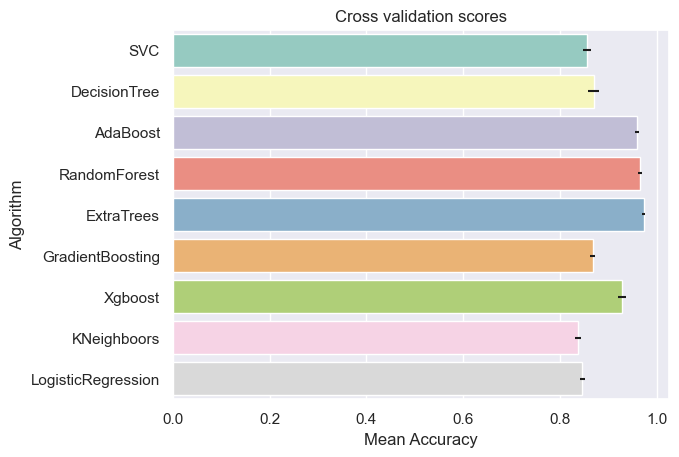

In [127]:
cv_means = []
cv_std   = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","Xgboost","KNeighboors","LogisticRegression"]})
print(cv_res)

g = sns.barplot(x=cv_res["CrossValMeans"],y =cv_res["Algorithm"],  palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

# Hyperparameter tuning

In [133]:
from sklearn.model_selection import RandomizedSearchCV
GBC = GradientBoostingClassifier()
gb_param_grid = {
                 
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              
              }
gsGBC=RandomizedSearchCV(estimator=GBC,param_distributions=gb_param_grid,random_state=3,scoring = "roc_auc", 
                                     cv =kfold,n_jobs=1)
 

gsGBC.fit(xtrain_prep,ytrain_prep)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=GradientBoostingClassifier(), n_jobs=1,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01],
                                        'max_depth': [4, 8],
                                        'min_samples_leaf': [100, 150],
                                        'n_estimators': [100, 200, 300]},
                   random_state=3, scoring='roc_auc')

In [134]:
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

0.8839231185642836

In [143]:
evaluation(GBC_best ,xvalid, yvalid)

Test AUC: 0.8236118989096868
Train AU  : 0.9308939838808762


In [146]:
RFC = RandomForestClassifier()

rf_param_grid = {"max_depth": [None],
              
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1)

gsRFC.fit(xtrain_prep,ytrain_prep)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None], 'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='roc_auc', verbose=1)

In [147]:
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

0.9739879729332156

In [148]:
evaluation(RFC_best,xvalid, yvalid)

Test AUC: 0.8095050524148651
Train AU  : 0.9999861530667634


In [150]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 100,200]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1)

gsSVMC.fit(xtrain_prep,ytrain_prep)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 200], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             scoring='roc_auc', verbose=1)

In [151]:
SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

0.939653246320219

In [152]:
evaluation(gsSVMC,xvalid, yvalid)

Test AUC: 0.723451188000252
Train AU  : 0.9835888557999777


In [153]:
XGBoost=xgboost.XGBClassifier()
xgboost_param_grid={
    'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3],
    'max_depth'    :[1,2,3,4,5,6,7,8,9,10],
    'min_child_weight':[1,3,5,7],
    'colsample_bytree':[0.3,0.4,0.5,0.6,0.7],
    'gamma':[0.0,0.1,0.2,0.3,0.4,0.5]
}
gsXGoost=RandomizedSearchCV(estimator=XGBoost,param_distributions=xgboost_param_grid,random_state=3,scoring = "roc_auc", 
                                     cv =kfold,n_jobs=1)


gsXGoost.fit(xtrain_prep,ytrain_prep)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           import...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=3, scoring='roc_auc')

In [154]:
XGBOOST_best = gsXGoost.best_estimator_

# Best score
gsXGoost.best_score_

0.9262333830805851

In [155]:
evaluation(XGBOOST_best,xvalid, yvalid)

Test AUC: 0.8019395600932753
Train AU  : 0.9931543231595515


In [157]:
logreg = LogisticRegression()
logreg_param_grid={
    'C':[100, 10, 1.0, 0.1, 0.01] ,
    'penalty':['l2']
}
gslogreg=GridSearchCV(logreg,param_grid = logreg_param_grid, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1)
gslogreg.fit(xtrain_prep,ytrain_prep)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2']},
             scoring='roc_auc', verbose=1)

In [158]:
LogReg_best = gslogreg.best_estimator_

# Best score
gslogreg.best_score_

0.8460158904134014

In [159]:
evaluation(LogReg_best,xvalid, yvalid)

Test AUC: 0.8395333081237788
Train AU  : 0.8483654092200936


In [160]:
votingC = VotingClassifier(estimators=[('gbc',GBC_best), ('rfc', RFC_best),
('xgboost',XGBOOST_best),('logreg',LogReg_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(xtrain_prep,ytrain_prep)

In [161]:
evaluation(votingC,xvalid, yvalid)

Test AUC: 0.8284332261927271
Train AU  : 0.9971768425652493


In [162]:
from mlxtend.classifier import StackingCVClassifier
scv=StackingCVClassifier(classifiers=[GBC_best,RFC_best,XGBOOST_best,LogReg_best],meta_classifier= XGBOOST_best,random_state=42)

In [163]:
scv.fit(xtrain_prep,ytrain_prep)
evaluation(scv,xvalid, yvalid)

Test AUC: 0.7938987626310372
Train AU  : 0.997787077794952
